<a href="https://colab.research.google.com/github/gowravmannem/Aromatase-Drug-Discovery/blob/main/Aromatase_project_part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 4: Regrression Models with Random Forest

## Loading Libraries

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np


##Loading Dataset

In [ ]:
aromatase_XY = pd.read_csv('aromatase_3class_pIC50_pubchem_fp.csv')

# Creating Input Features

## X values

In [ ]:
aromatase_X = aromatase_XY.drop('pIC50', axis=1)
aromatase_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2812,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2813,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2814,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2815,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Y values

In [ ]:
aromatase_Y = aromatase_XY.pIC50
aromatase_Y

0       5.148742
1       4.301030
2       6.623423
3       7.244125
4       7.267606
          ...   
2812    8.280669
2813    6.982967
2814    7.752027
2815    7.218963
2816    6.357535
Name: pIC50, Length: 2817, dtype: float64

## Data Dimensions

In [ ]:
aromatase_X.shape

(2817, 881)

In [ ]:
aromatase_Y.shape

(2817,)

# Removing low Variance Data Features

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    

aromatase_X = selection.fit_transform(aromatase_X)

In [ ]:
aromatase_X.shape

(2817, 152)

# Splitting Data with 80:20 ratio

In [ ]:
aromatase_X_train, aromatase_X_test, aromatase_Y_train, aromatase_Y_test = train_test_split(aromatase_X, aromatase_Y, test_size=0.2)

In [ ]:
aromatase_X_train.shape, aromatase_Y_train.shape

((2253, 152), (2253,))

In [ ]:
aromatase_X_test.shape, aromatase_Y_test.shape

((564, 152), (564,))

# Building a Regression Model using Random Forest

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(aromatase_X_train, aromatase_Y_train)
aromatase_pred_r2 = model.score(aromatase_X_test, aromatase_Y_test)
aromatase_pred_r2

0.48519039337703307

In [ ]:
Y_pred = model.predict(aromatase_X_test)

# Scatterplot of Experimental vs. Predicted pIC50 Values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


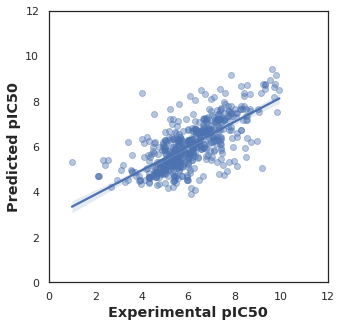

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(aromatase_Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show
plt.savefig('pred_vs_exp_pIC50.pdf')